In [ ]:
%pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"wickramasinghebk","key":"705d92d032039aebbc7ef6e5a74c00f5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
# Instead of importing from keras.preprocessing.image, use tf.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the neural network/model
emotion_model_info = emotion_model.fit( # Use fit instead of fit_generator
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.2527 - loss: 1.8064 - val_accuracy: 0.4247 - val_loss: 1.5025
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3750 - loss: 1.4860

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3750 - loss: 1.4860 - val_accuracy: 0.6000 - val_loss: 1.2971
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.4316 - loss: 1.4698 - val_accuracy: 0.5022 - val_loss: 1.2987
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.4531 - loss: 1.5020 - val_accuracy: 0.3000 - val_loss: 1.4578
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4974 - loss: 1.2974 - val_accuracy: 0.5250 - val_loss: 1.2220
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.4844 - loss: 1.4013 - val_accuracy: 0.5000 - val_loss: 1.1176
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5358 - loss: 1.2106 - val_accuracy: 0.5585 - val_loss: 1.1603
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 1.1953 - val_accuracy: 0.5000 - val_loss: 1.2892
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5645 - loss: 1.1462 - val_accuracy: 0.5

Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8053 - loss: 0.5393 - val_accuracy: 0.6161 - val_loss: 1.1636
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8125 - loss: 0.4727 - val_accuracy: 0.5000 - val_loss: 1.2625
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8022 - loss: 0.5368 - val_accuracy: 0.6154 - val_loss: 1.1599
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.7500 - loss: 0.6444 - val_accuracy: 0.6000 - val_loss: 0.9470
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8103 - loss: 0.5137 - val_accuracy: 0.6182 - val_loss: 1.1641
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.8750 - loss: 0.3688 - val_accuracy: 0.9000 - val_loss: 0.4187
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8174 - loss: 0.5018 - val_accuracy: 0.6235 - val_loss: 1.2031
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.7656 - loss: 0.6046 - val

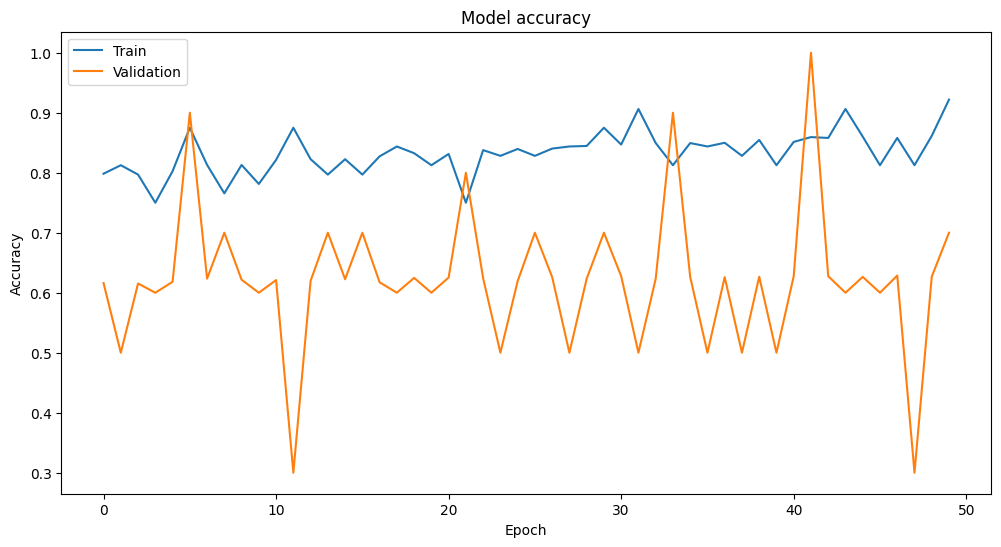

In [ ]:
import matplotlib.pyplot as plt

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create necessary directories
import os
os.makedirs('/content/drive/MyDrive/SavedModels/ImotionDetectionUsingFace', exist_ok=True)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("/content/drive/MyDrive/SavedModels/ImotionDetectionUsingFace/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('/content/drive/MyDrive/SavedModels/ImotionDetectionUsingFace/emotion_model.weights.h5') # Changed filename to include .weights

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
